### Exploratory Data Analysis Project - Diwali Sales Data Analysis


##### *Project by - Vinay Jha*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Diwali Sales Data.csv',encoding = "unicode_escape")

In [20]:
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [3]:
#drop unrelated blank values
df.drop(["Status", "unnamed1"],axis = 1,inplace = True)

In [4]:
#check for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [18]:
#drop null values
df.dropna(inplace = True)

In [19]:
#use describe for specific columns
df[["Age","Orders","Amount"]].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610858
std,12.753866,1.114967,5222.355869
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis 

### Gender

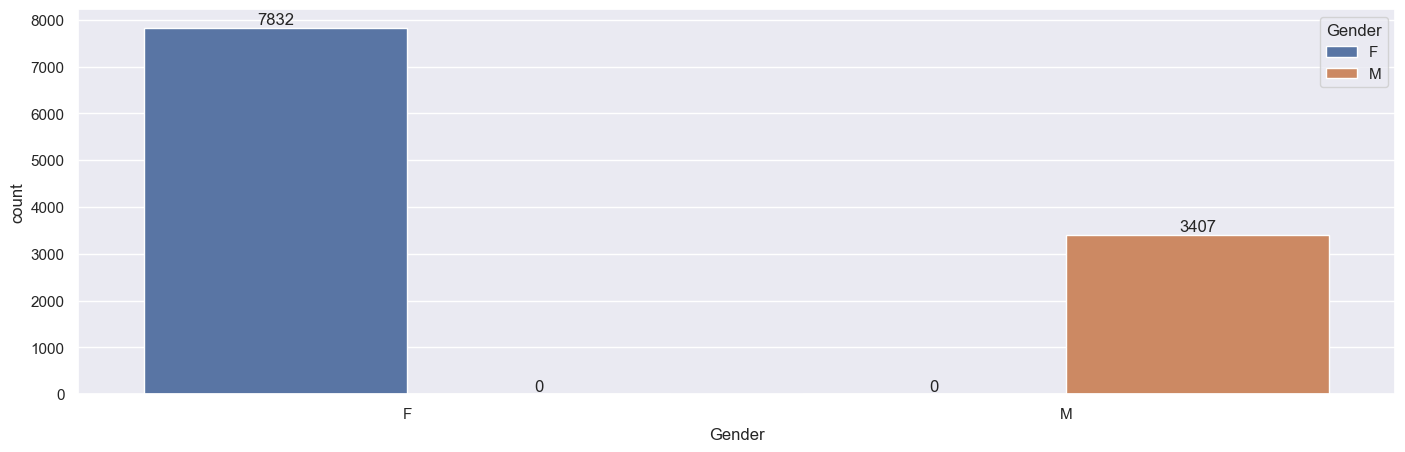

In [21]:
ax = sns.countplot(x = "Gender",data = df, hue = "Gender")

for bars in ax.containers:
    ax.bar_label(bars)

In [22]:
sales_gen = df.groupby(["Gender"],as_index = False)["Amount"].sum().sort_values(by = "Amount",ascending = False)

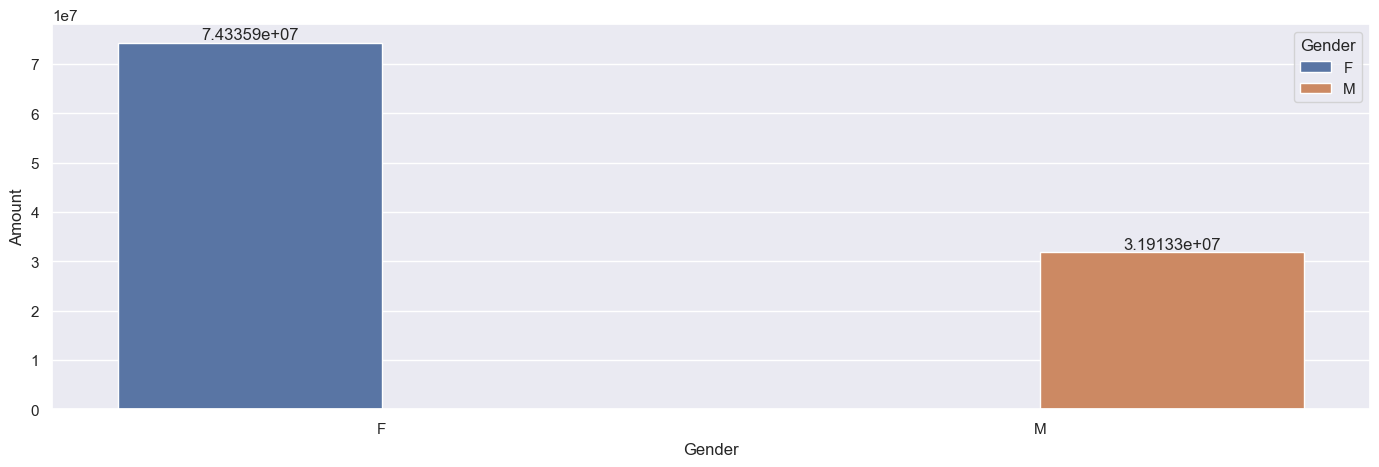

In [23]:
ab = sns.barplot(x = "Gender",y = "Amount",data = sales_gen, hue = "Gender")

for bars in ab.containers:
    ab.bar_label(bars)

*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*

### Age

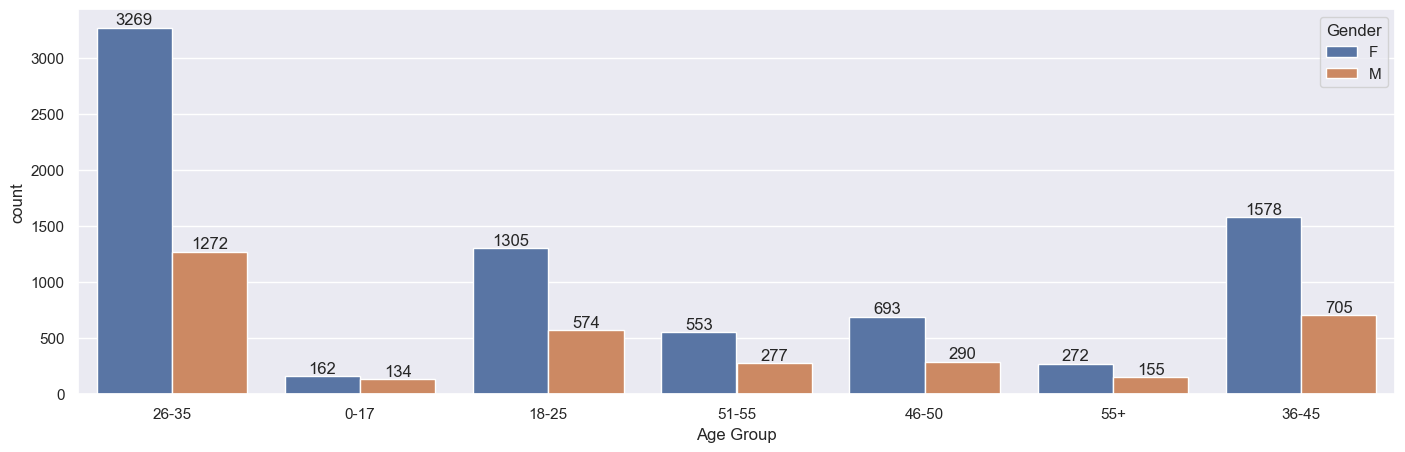

In [24]:
ax = sns.countplot(x = "Age Group",data = df,hue = "Gender")

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

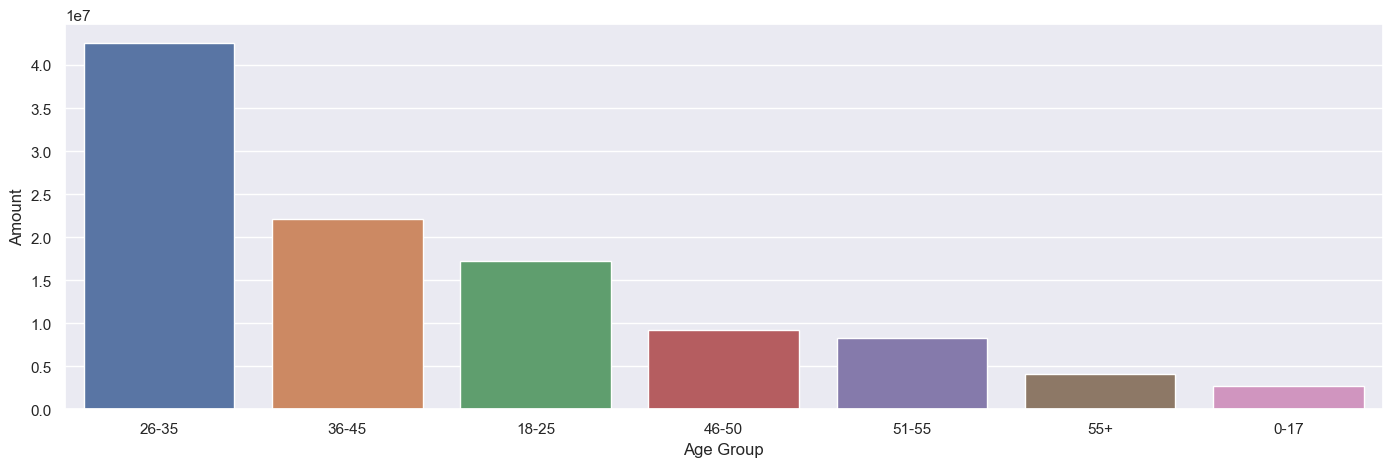

In [25]:
#Total Amount vs Age Group

sales_age = df.groupby("Age Group",as_index = False)["Amount"].sum().sort_values(by = "Amount",ascending = False)

sns.barplot(x = "Age Group", y = "Amount", data = sales_age)


*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*

### State

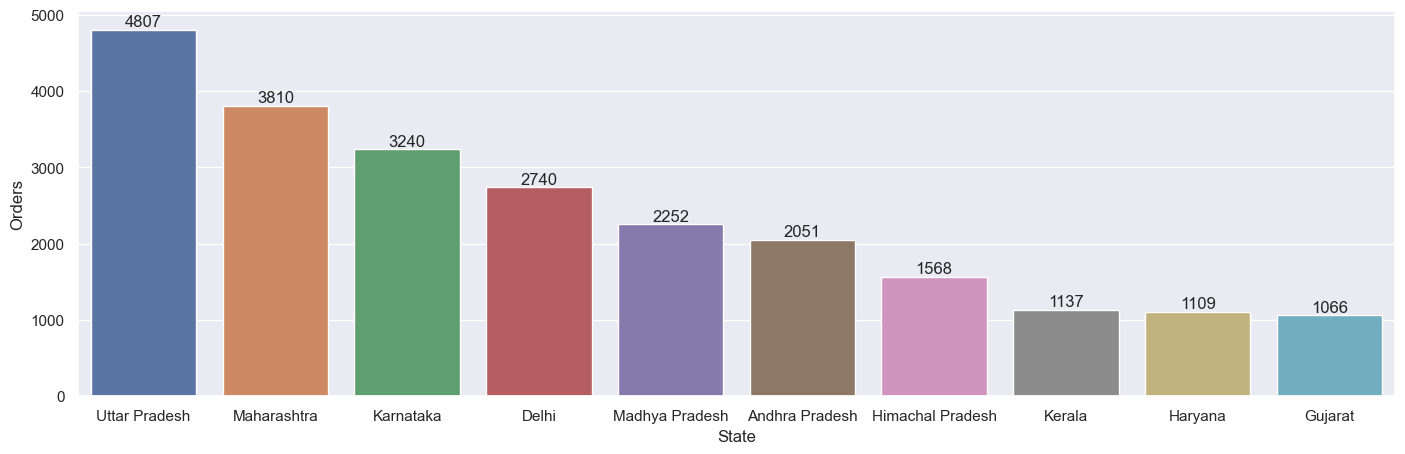

In [26]:
#Total number of orders from top 10 states

sales_state = df.groupby(["State"], as_index= False)["Orders"].sum().sort_values(by = "Orders",ascending = False).head(10)

sns.set(rc = {"figure.figsize":(17,5)})
sb = sns.barplot(x = "State",y = "Orders",data = sales_state)

for bars in sb.containers:
    sb.bar_label(bars)

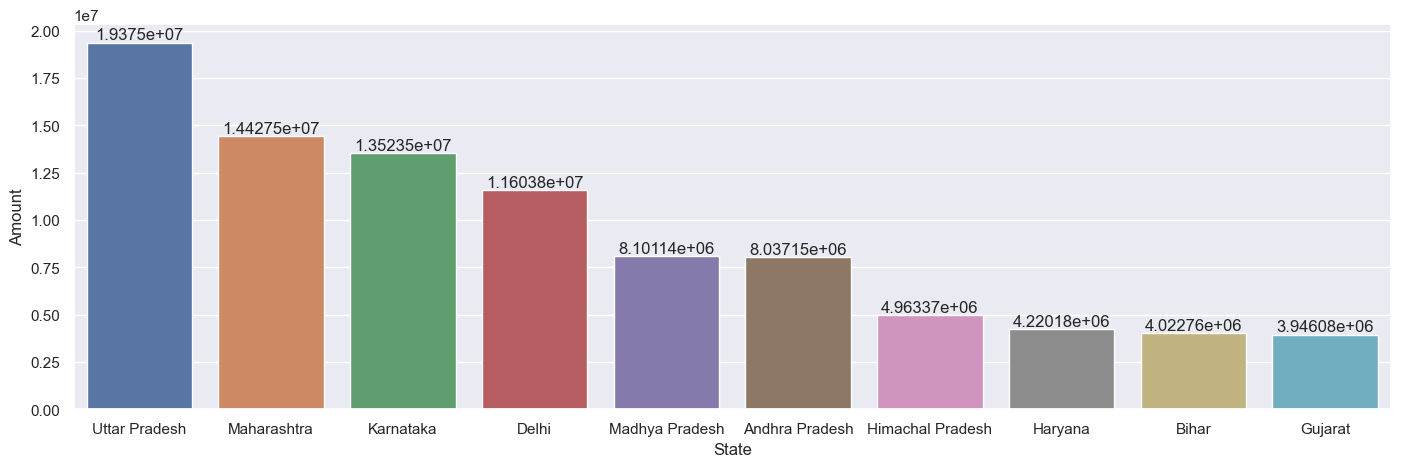

In [27]:
#total amount/sales from top 10 states

sales_state = df.groupby("State",as_index= False)["Amount"].sum().sort_values(by = "Amount",ascending = False).head(10)

sns.set(rc = {"figure.figsize":(17,5)})
ab = sns.barplot(x = "State",y = "Amount",data = sales_state)

for bars in ab.containers:
    ab.bar_label(bars)

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*


### Marital Status

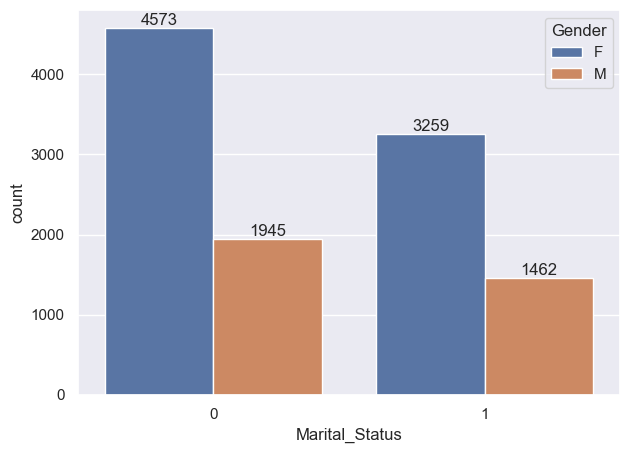

In [42]:
#order count by Marital_Status and Gender
ax = sns.countplot(x = "Marital_Status", data = df, hue = "Gender")

sns.set(rc = {"figure.figsize":(7,5)})

for bars in ax.containers:
    ax.bar_label(bars)

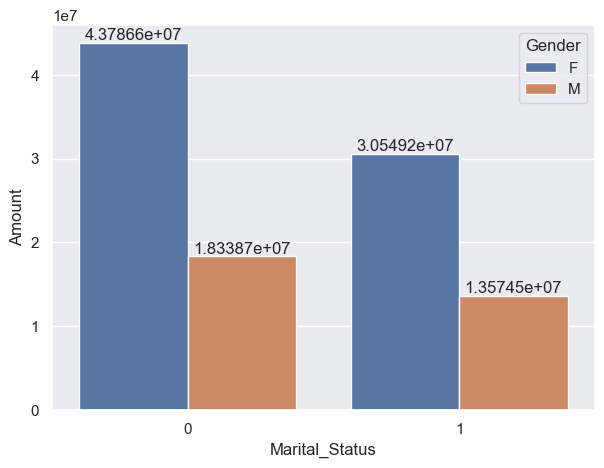

In [45]:
#total amount/sales from Marital Status

married_sales = df.groupby(["Marital_Status","Gender"], as_index = False)["Amount"].sum().sort_values(by = "Amount",ascending = False)

ax = sns.barplot(x = "Marital_Status", y = "Amount",data = married_sales, hue = "Gender")

for bars in ax.containers:
    ax.bar_label(bars)

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

### Occupation

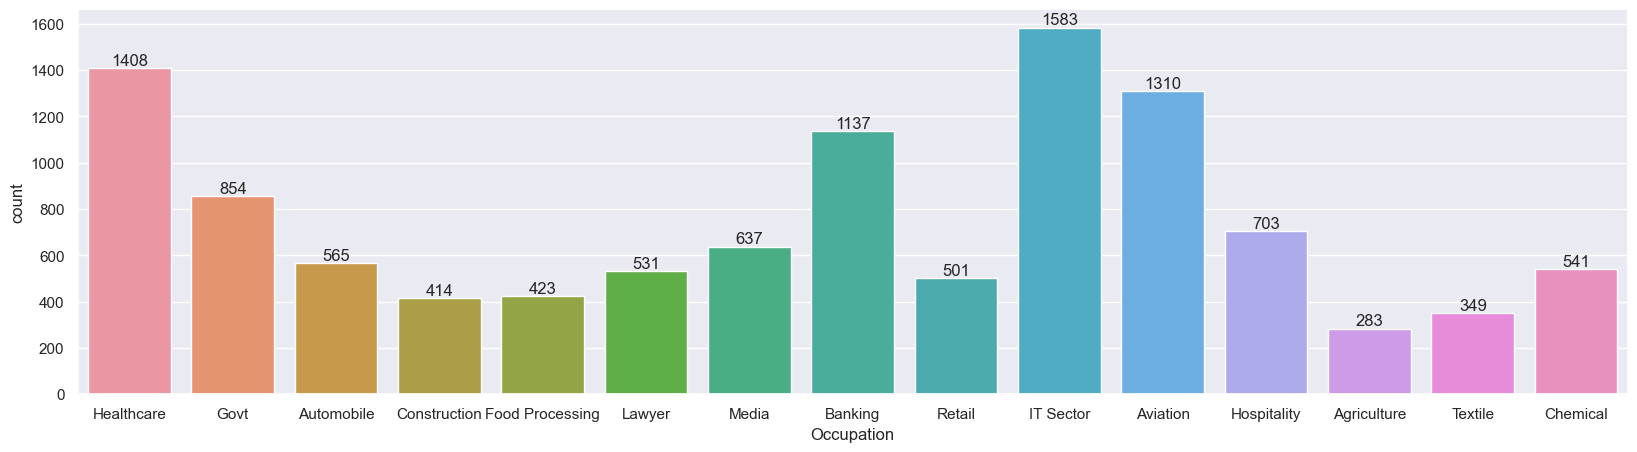

In [51]:
#orders count by occupation
ax = sns.countplot(x = "Occupation", data = df)

sns.set(rc = {"figure.figsize": (30,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

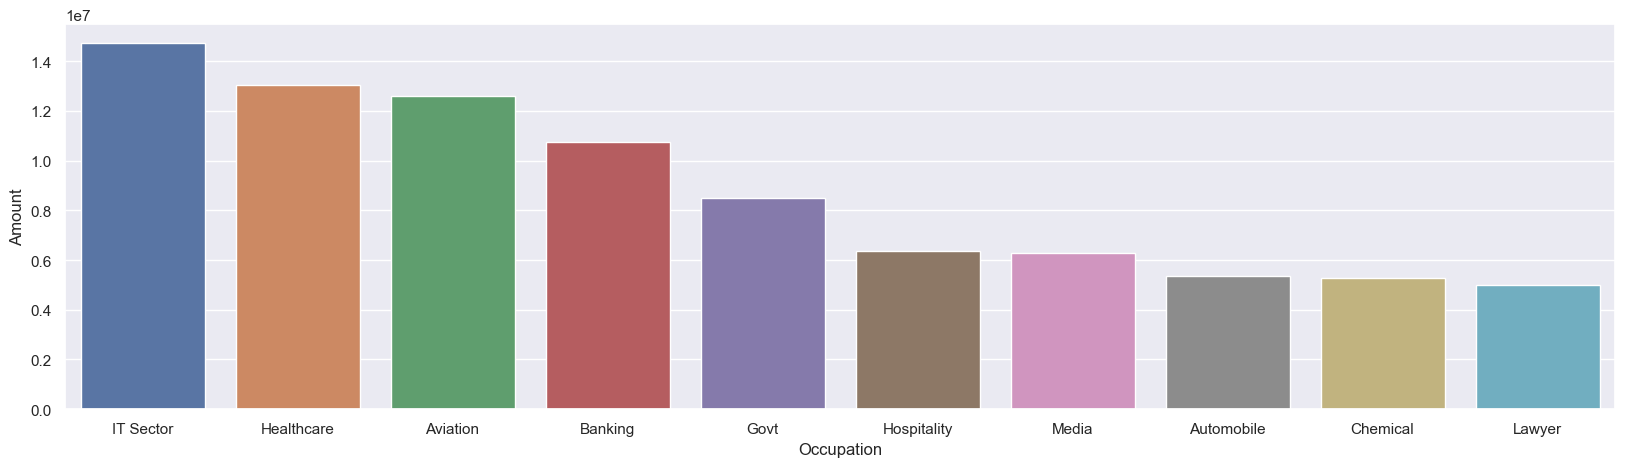

In [56]:
#total amount/sales from top 10 Occupations

sales_occupation = df.groupby("Occupation",as_index = False)["Amount"].sum().sort_values(by = "Amount",ascending = False ).head(10)

sns.set(rc = {"figure.figsize":(20,5)})
sns.barplot(x = "Occupation", y = "Amount", data = sales_occupation)

*From above graphs we can see that most of the buyers are working in IT, Aviation and Healthcare sector*

### Product Category

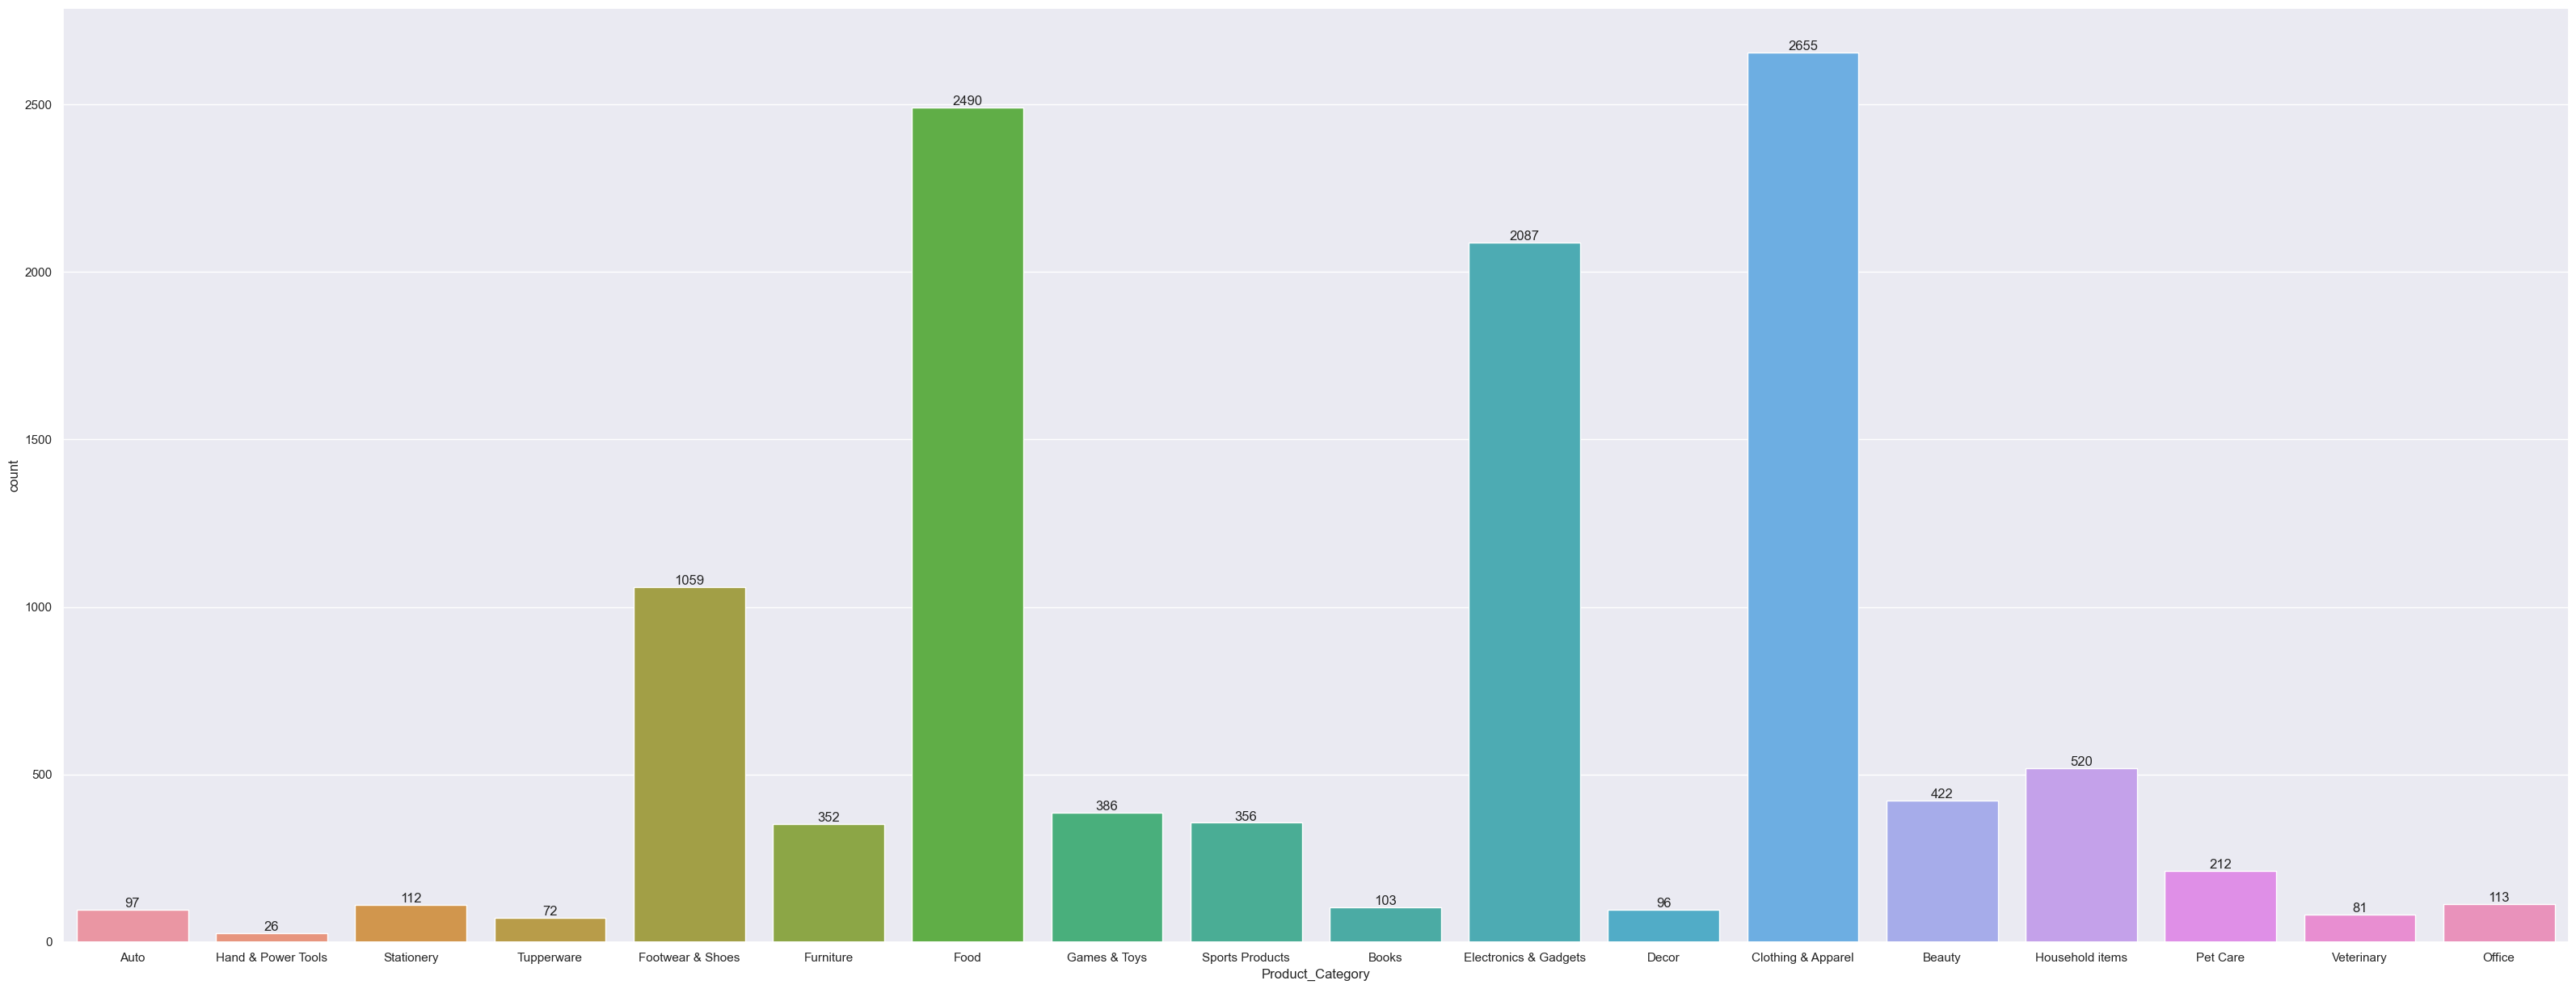

In [74]:
#Orders count as per Product_category
ax = sns.countplot(x = "Product_Category", data = df)
sns.set(rc = {"figure.figsize":(40,10)})

for bars in ax.containers:
    ax.bar_label(bars)

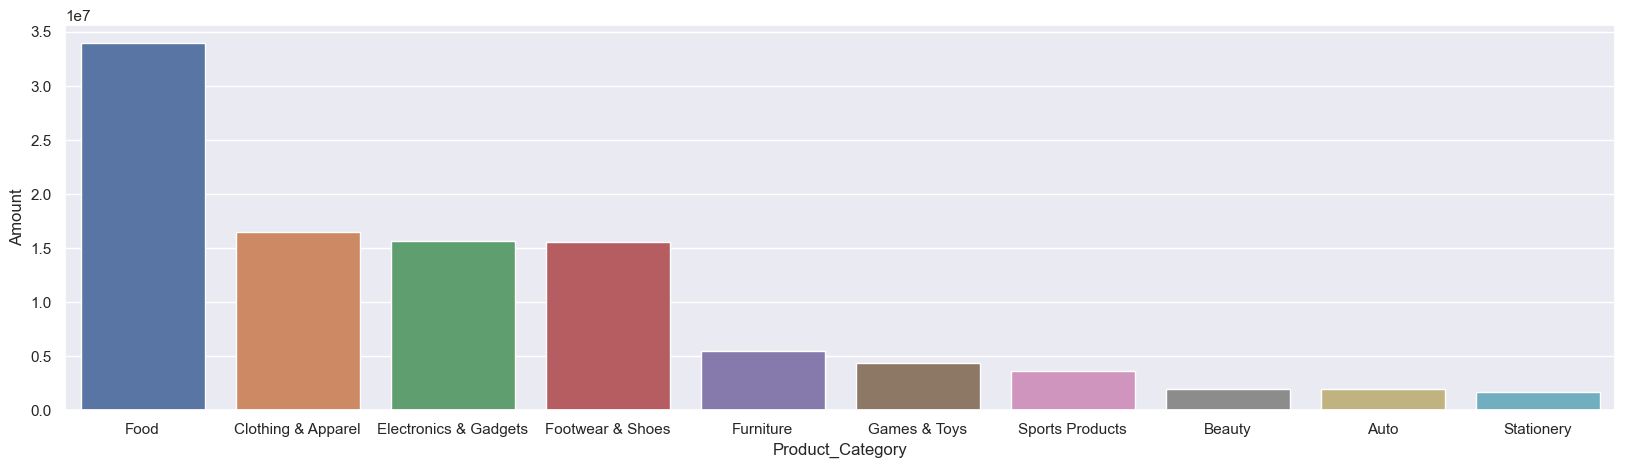

In [76]:
#Amount/sales as per top 10 Product_Category

product_sales = df.groupby("Product_Category",as_index = False)["Amount"].sum().sort_values(by = "Amount",ascending = False).head(10)

sns.set(rc={"figure.figsize":(20,5)})

ax = sns.barplot(x = "Product_Category", y = "Amount", data = product_sales)


*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

# Conclusion:

### 

*Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*

Thank You!